In [ ]:
library(dplyr)
library(data.table)
library(lubridate)
library(ggplot2)

In [5]:
data = fread("compressed_data.csv.gz") %>% 
    filter(!is.na(prcod)) %>% 
        mutate(datadate = as.Date(datadate, "%d/%m/%Y"))
head(data)



tic,datadate,conm,exchg,sic,cshtrd,prccd,prchd,prcld,prcod,gvkey
<chr>,<date>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
PNW,2023-01-03,PINNACLE WEST CAPITAL CORP,11,4911,1442534,74.63,76.4125,73.380,76.25,1075
PNW,2023-01-04,PINNACLE WEST CAPITAL CORP,11,4911,954218,75.39,76.0950,74.630,75.10,1075
PNW,2023-01-05,PINNACLE WEST CAPITAL CORP,11,4911,994775,73.65,75.0950,73.305,74.88,1075
PNW,2023-01-06,PINNACLE WEST CAPITAL CORP,11,4911,729808,75.46,76.0200,74.480,74.49,1075
PNW,2023-01-09,PINNACLE WEST CAPITAL CORP,11,4911,656127,75.55,76.4800,75.240,75.24,1075
PNW,2023-01-10,PINNACLE WEST CAPITAL CORP,11,4911,763254,75.65,75.6950,74.880,75.31,1075


## A1 Analysis

[1] "There are 502 unique tickers."

[1] "There are 499 unique company names."

tic,mean_trading_v
<chr>,<dbl>
TSLA,115314383
NVDA,113131835
PLTR,60056251
AAPL,57736403
AMD,57143415


exchg,total_trading_v
<int>,<dbl>
11,681415756062
14,570830885382
21,385399362


conm,tickers
<chr>,<int>
ALPHABET INC,2
FOX CORP,2
NEWS CORP,2
NA,NA


tic,datadate,conm,exchg,sic,cshtrd,prccd,prchd,prcld,prcod,gvkey,return
<chr>,<date>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
PNW,2023-01-03,PINNACLE WEST CAPITAL CORP,11,4911,1442534,74.63,76.4125,73.380,76.25,1075,NA
PNW,2023-01-04,PINNACLE WEST CAPITAL CORP,11,4911,954218,75.39,76.0950,74.630,75.10,1075,0.010183572
PNW,2023-01-05,PINNACLE WEST CAPITAL CORP,11,4911,994775,73.65,75.0950,73.305,74.88,1075,-0.023079984
PNW,2023-01-06,PINNACLE WEST CAPITAL CORP,11,4911,729808,75.46,76.0200,74.480,74.49,1075,0.024575696
PNW,2023-01-09,PINNACLE WEST CAPITAL CORP,11,4911,656127,75.55,76.4800,75.240,75.24,1075,0.001192685
PNW,2023-01-10,PINNACLE WEST CAPITAL CORP,11,4911,763254,75.65,75.6950,74.880,75.31,1075,0.001323627


tic,mean_return
<chr>,<dbl>
PLTR,0.005785119
COIN,0.005497913
GEV,0.005246567
VST,0.004044824
META,0.003367155
RCL,0.003353639


[1] "The PLTR ticker had the higest mean daily return."

[1] "The return was 0.58 %."

[1] "The PLTR company had the higest mean daily return."

[1] "The 6798 SIC industry has the most companies."

[1] "There are 28 companies in the industry"

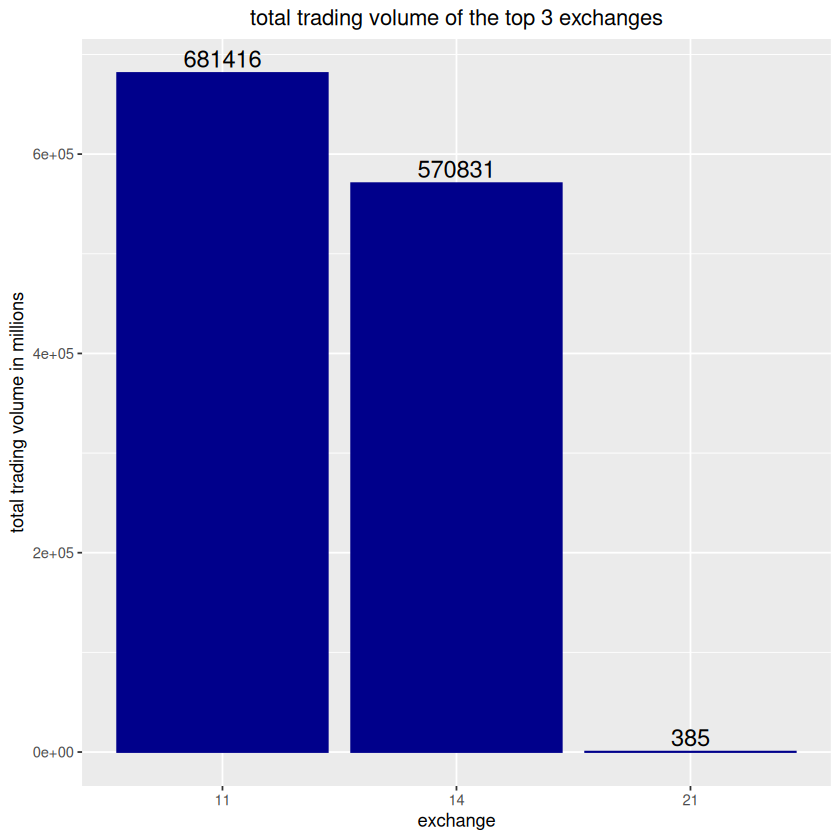

In [ ]:
# 1. How many unique tickers are in your data?
unique_tic_n = length(unique(data$tic))
paste("There are", unique_tic_n, "unique tickers.")

# 2. How many unique companies are in your data?
unique_conm_n = length(unique(data$conm))
paste("There are", unique_conm_n, "unique company names.")

# 3. Display the top 5 companies by largest mean trading volume, in a table.
data_3 = data %>%
    group_by(tic) %>%
    summarise(mean_trading_v = mean(cshtrd, na.rm = TRUE)) %>%
    ungroup() %>%
        arrange(desc(mean_trading_v))
data_3[1:5,]

# 4. Display the total trading volume of the top 3 exchanges by largest total trading volume, in a table.
data_4 = data %>%
    group_by(exchg) %>%
    summarise(total_trading_v = sum(cshtrd, na.rm = TRUE)) %>%
    ungroup() %>%
        arrange(desc(total_trading_v))
data_4[1:3,]

# 5. Visualise the total trading volume of the top 3 exchanges by largest total trading volume, in a bar plot.
ggplot(data_4, aes(x = as.character(exchg), y = total_trading_v/1000000)) +
  geom_bar(stat = "identity", color = "darkblue", fill = "darkblue") +
  geom_text(aes(label = round(total_trading_v/1000000)),
            vjust = -0.3,              # position above the bar
            size = 5) +               # text size
  labs(title = "total trading volume of the top 3 exchanges",
  x= "exchange", y="total trading volume in millions") +
  theme(plot.title = element_text(hjust = 0.5))

# 6. How many companies have more than one ticker?
data_6 = data %>%
    group_by(conm) %>%
    summarise(tickers = n_distinct(tic)) %>%
    ungroup() %>% 
    filter(!tickers == 1)
data_6[1:4,]

# 7. Which ticker has the largest positive mean return (simple daily return)?
data = data %>% 
    group_by(tic) %>% 
    mutate(return = prccd/lag(prccd)-1) %>% 
    ungroup()
head(data)

data_7 = data %>% 
    group_by(tic) %>% 
    summarise(mean_return = mean(return, na.rm = TRUE)) %>% 
    ungroup() %>% 
        arrange(desc(mean_return))
head(data_7)

highest_mean_return = max(data_7$mean_return)

highest_mean_return_ticker = data_7$tic[
    which.max(data_7$mean_return)
]
paste("The", highest_mean_return_ticker, "ticker had the higest mean daily return.")
paste("The return was", round(highest_mean_return, 4)*100,"%.")

# 8. Which company has the largest positive mean return (simple daily return)?
paste("The", highest_mean_return_ticker, "company had the higest mean daily return.")

# 9. Which industry is represented by the most companies?
data_9 = data %>%
    group_by(sic) %>%
    summarise(no_companies = n_distinct(conm)) %>%
    ungroup() %>% 
    arrange(desc(no_companies))
most_represented_industry = data_9$sic[
    which.max(data_9$no_companies)
]
no_companies_in_most_represented_industry = max(data_9$no_companies)

paste("The", most_represented_industry, "SIC industry has the most companies.")
paste("There are", no_companies_in_most_represented_industry, "companies in that industry.")


## A2 Analysis

In [65]:
# 1. Calculate simple weekly returns for each ticker in the full dataset using the following formula
data_weeks = data %>% 
    group_by(datadate) %>% 
    summarise(week = week(datadate)) %>% 
    ungroup()
data_weeks[5:10,]

Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”
`summarise()` has grouped output by 'datadate'. You can override using the
`.groups` argument.


datadate,week
<date>,<dbl>
2023-01-03,1
2023-01-03,1
2023-01-03,1
2023-01-03,1
2023-01-03,1
2023-01-03,1
